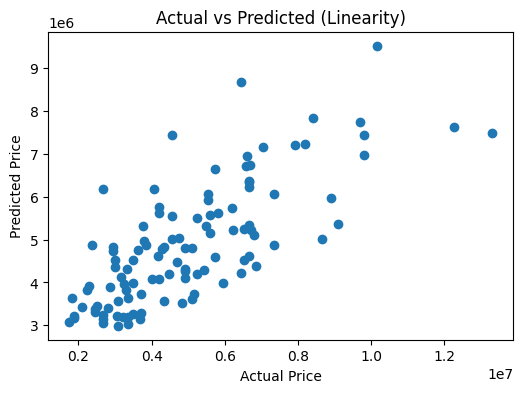

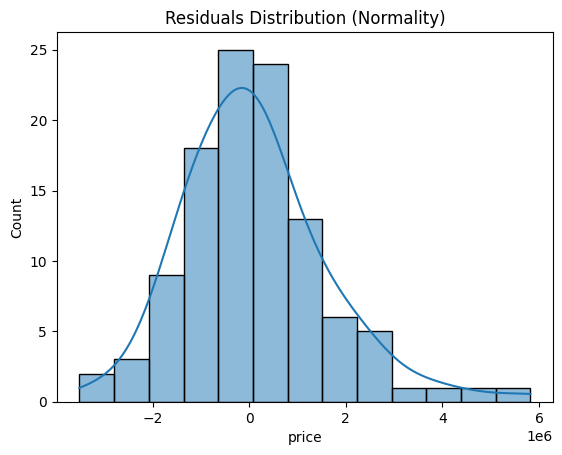

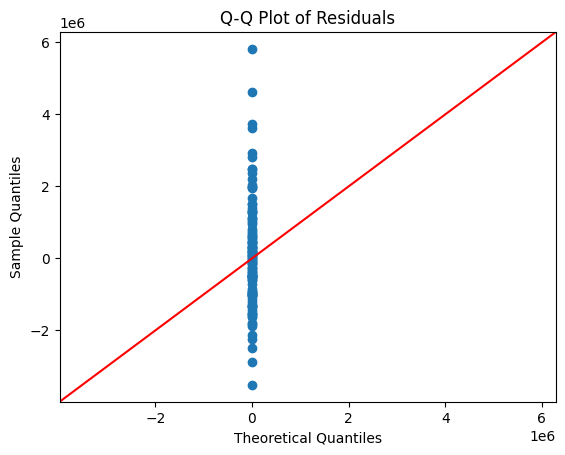

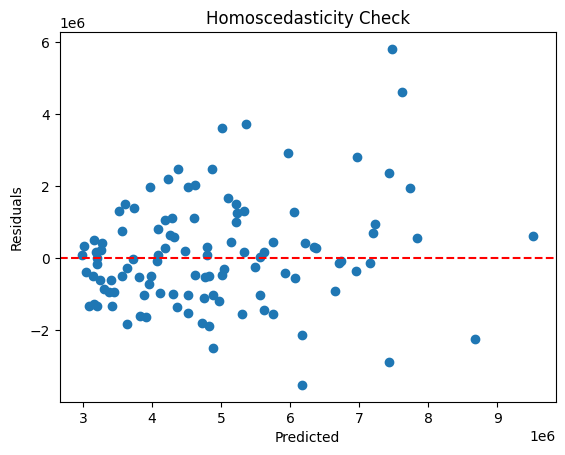

Durbin-Watson statistic: 2.26
     feature        VIF
0       area   6.737363
1   bedrooms  13.652525
2  bathrooms   9.155151
3    stories   6.683602
4    parking   1.901606
Dropping 'bedrooms' due to high VIF
     feature       VIF
0       area  5.661991
1  bathrooms  7.005821
2    stories  5.234207
3    parking  1.901567
Dropping 'bathrooms' due to high VIF
   feature       VIF
0     area  4.363507
1  stories  3.496874
2  parking  1.883664
Normal Equation Ridge:
MSE: 1531011468278.2815
R2: 0.5615817118216255
Gradient Descent Ridge:
MSE: 1531011472041.1448
R2: 0.5615817107440972
Best alpha: 1
Test MSE: 2292339966940.7446
Test R2: 0.5464817273849003


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Q1: Linear Regression Model & Assumptions Check

import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("./archive/Housing.csv")
# Assuming 'df' is your DataFrame and target is 'price'
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 1. Linearity
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Linearity)")
plt.show()

# 2. Normality of residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (Normality)")
plt.show()
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. Homoscedasticity
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# 4. Independence (Durbin-Watson)
dw = sm.stats.stattools.durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw:.2f}")

# 5. Multicollinearity (VIF will be checked in Q2)

# Q2: VIF Analysis & Fixing Multicollinearity


vif_data = X.copy()
vif = pd.DataFrame()
vif["feature"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
print(vif)

# If VIF > 5 or 10, drop the feature with highest VIF and recalculate
while vif['VIF'].max() > 5:
    drop_feature = vif.sort_values('VIF', ascending=False)['feature'].iloc[0]
    print(f"Dropping '{drop_feature}' due to high VIF")
    X = X.drop(columns=[drop_feature])
    vif_data = X.copy()
    vif = pd.DataFrame()
    vif["feature"] = vif_data.columns
    vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    print(vif)

# Q3: Ridge Regression from Scratch

# a) Prepare data
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']
X = (X - X.mean()) / X.std()  # Standardize features
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
y = y.values.reshape(-1, 1)

# b) Ridge Normal Equation
def ridge_normal_eq(X, y, alpha):
    n = X.shape[1]
    I = np.eye(n)
    I[0,0] = 0  # Don't penalize intercept
    w = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
    return w

# c) Ridge Gradient Descent
def ridge_gradient_descent(X, y, alpha, lr=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros((n,1))
    for epoch in range(epochs):
        y_pred = X @ w
        grad = (2/m) * (X.T @ (y_pred - y) + alpha * np.r_[[[0]], w[1:]])
        w -= lr * grad
    return w

# Fit both models
alpha = 1.0
w_ne = ridge_normal_eq(X, y, alpha)
w_gd = ridge_gradient_descent(X, y, alpha)

# Predictions
y_pred_ne = X @ w_ne
y_pred_gd = X @ w_gd

# Evaluation
print("Normal Equation Ridge:")
print("MSE:", mean_squared_error(y, y_pred_ne))
print("R2:", r2_score(y, y_pred_ne))

print("Gradient Descent Ridge:")
print("MSE:", mean_squared_error(y, y_pred_gd))
print("R2:", r2_score(y, y_pred_gd))

# Q4: Hyperparameter Tuning with GridSearchCV


X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_['alpha'])

# Evaluate on test data
y_pred = grid.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R2:", r2_score(y_test, y_pred))

Simple Linear Regression Coef: [461.97489427] Intercept: 2387308.4823964303


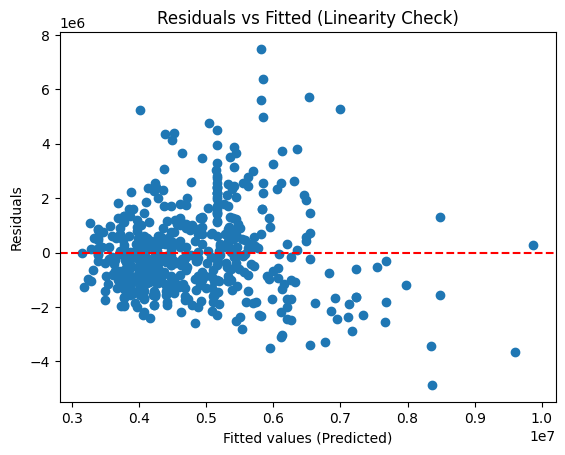

In [9]:
 #! Q1: Use the above given dataset, fit the Linear regression model using the function of Sklearn library. 
 #! Check for all 5 assumptions of the linear regression.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

data = pd.read_csv("./archive/Housing.csv")
x = data['area'].values
y = data['price'].values

simple_lr = LinearRegression()

x = data['area'].values
y = data['price'].values

x_reshaped = x.reshape(-1, 1)

# print(x_reshaped.shape, y.shape)

simple_lr.fit(x_reshaped, y)
y_pred_sklearn_simple = simple_lr.predict(x_reshaped)
print("Simple Linear Regression Coef:", simple_lr.coef_, "Intercept:", simple_lr.intercept_)

# Assumption One: Linearity of the Data
# Residual vs Fitted plot for linearity check

residuals_simple = y - y_pred_sklearn_simple
plt.scatter(y_pred_sklearn_simple, residuals_simple)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Linearity Check)")
plt.show()
